IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Mélissa Lacour & Céline Fan

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import random
import statistics
from sklearn.utils import shuffle
%matplotlib inline

import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie pickle
import pickle as pkl

%load_ext autoreload
%autoreload 2

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)


# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb')) 
X5D = np.array(data5D[['x1', 'x2','x3', 'x4', 'x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)

In [3]:
data2D[0:5]
print(str(data2D.shape))

(2000, 3)


In [4]:
data5D[0:5]

,x1,x2,x3,x4,x5,label
0,-0.472352,-0.035994,0.572799,2.017446,-1.865967,-1
1,1.993913,0.984667,-1.180237,1.460067,-0.195743,-1
2,0.923188,1.194008,0.065319,0.909784,0.832256,-1
3,2.540148,-0.427836,-0.113014,3.257095,-1.689755,-1
4,4.331413,0.590868,-1.105335,4.475987,-1.790176,-1


In [5]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [6]:
X5D[0:5]

array([[-0.4723522 , -0.03599385,  0.57279854,  2.01744639, -1.86596742],
       [ 1.9939134 ,  0.9846668 , -1.18023654,  1.46006741, -0.19574327],
       [ 0.92318832,  1.19400787,  0.06531872,  0.90978449,  0.83225595],
       [ 2.54014784, -0.42783646, -0.11301444,  3.2570952 , -1.68975456],
       [ 4.33141251,  0.59086794, -1.10533473,  4.47598742, -1.79017634]])

In [7]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

In [8]:
Y5D[0:5]

array([-1., -1., -1., -1., -1.])

## Code utilisé dans le notebook

Voici la classe abstraite Classifier :

In [3]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        cpt_ok = 0
        for i in range (0, len(desc_set)):
            if (self.predict(desc_set[i]) == label_set[i]):
                cpt_ok += 1
        
        return cpt_ok/len(label_set)

Voici les différentes fonctions utilisées :

In [4]:
def crossval_strat(X, Y, n_iterations, iteration):
    """renvoie un dataset et un label d'entrainement et de d'apprentissage, suivant le modèle de la validation croisée"""
        # Séparation par classe
    Xp = {}
    Yp = {}
    for i in range(len(X)):
        if Y[i] not in Xp:
            Xp[Y[i]] = []
            Yp[Y[i]] = []
        Xp[Y[i]].append(X[i])
        Yp[Y[i]].append(Y[i])
    
    # Calculer le nombre d'exemples pour chaque ensemble de test
    n_test = {}
    for k, v in Xp.items():
        n_test[k] = int(len(v) / n_iterations)
    
    # Extraire les exemples pour l'ensemble de test courant
    Xtest = []
    Ytest = []
    for k, v in Xp.items():
        start = iteration * n_test[k]
        end = start + n_test[k]
        Xtest += v[start:end]
        Ytest += Yp[k][start:end]
        
    # Extraire les exemples pour l'ensemble d'apprentissage
    Xapp = []
    Yapp = []
    for k, v in Xp.items():
        Xapp += v[:iteration*n_test[k]] + v[(iteration+1)*n_test[k]:]
        Yapp += Yp[k][:iteration*n_test[k]] + Yp[k][(iteration+1)*n_test[k]:]
    
    # Convertir en numpy arrays
    Xapp = np.array(Xapp)
    Yapp = np.array(Yapp)
    Xtest = np.array(Xtest)
    Ytest = np.array(Ytest)
   
    return Xapp, Yapp, Xtest, Ytest

def genere_train_test(desc_set, label_set, n_pos, n_neg):
	""" permet de générer une base d'apprentissage et une base de test
	desc_set: ndarray avec des descriptions
	label_set: ndarray avec les labels correspondants
	n_pos: nombre d'exemples de label +1 à mettre dans la base d'apprentissage
	n_neg: nombre d'exemples de label -1 à mettre dans la base d'apprentissage
	Hypothèses:
    - desc_set et label_set ont le même nombre de lignes)
    - n_pos et n_neg, ainsi que leur somme, sont inférieurs à n (le nombre d'exemples dans desc_set)
	"""

	# On commence par mélanger les données:
	desc_set, label_set = shuffle(desc_set, label_set)

	# On récupère les indices des exemples de classe -1:
	indices_negatifs = np.where(label_set == -1)[0]
	# On récupère les indices des exemples de classe +1:
	indices_positifs = np.where(label_set == +1)[0]

	# On tire aléatoirement n_pos indices parmi les indices des exemples de classe +1:
	indices_positifs_train = random.sample(list(indices_positifs), n_pos)
	# On tire aléatoirement n_neg indices parmi les indices des exemples de classe -1:
	indices_negatifs_train = random.sample(list(indices_negatifs), n_neg)

	# On récupère les indices des exemples de classe -1 qui ne sont pas dans la base d'apprentissage:
	indices_negatifs_test = list(set(indices_negatifs) - set(indices_negatifs_train))
	# On récupère les indices des exemples de classe +1 qui ne sont pas dans la base d'apprentissage:
	indices_positifs_test = list(set(indices_positifs) - set(indices_positifs_train))

	# On récupère les exemples de la base d'apprentissage:
	desc_train = np.concatenate((desc_set[indices_negatifs_train], desc_set[indices_positifs_train]))
	label_train = np.concatenate((label_set[indices_negatifs_train], label_set[indices_positifs_train]))

	# On récupère les exemples de la base de test:
	desc_test = np.concatenate((desc_set[indices_negatifs_test], desc_set[indices_positifs_test]))
	label_test = np.concatenate((label_set[indices_negatifs_test], label_set[indices_positifs_test]))

	return (desc_train, label_train), (desc_test, label_test)

def plot2DSet(desc,labels):    
    """ ndarray * ndarray -> affichage
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """
   #TODO: A Compléter  
    # Affichage de l'ensemble des exemples :
    # Extraction des exemples de classe -1:
    negatifs =desc[labels == -1]
    # Extraction des exemples de classe +1:
    positifs = desc[labels == +1]
    plt.scatter(negatifs[:,0],negatifs[:,1],marker='o', color="red") # 'o' rouge pour la classe -1
    plt.scatter(positifs[:,0],positifs[:,1],marker='x', color="blue") # 'x' bleu pour la classe +1
    return

# plot_frontiere:
def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé: plus il est important
        et plus le tracé de la frontière sera précis.        
        Cette fonction affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])

# TACHES A FAIRE

- explications de choix des tests
- analyse des résultats


# Sommaire

### <p><font color="green"> 1. Etude de la classe ClassifierKNN </font></p>
<p><font color="green"> 1.1 Recherche du k optimal sur une base de test 2D </font> </p>
<p><font color="green"> 1.2 Recherche du k optimal sur une base de test 5D  </font></p>
<p><font color="green"> 1.3 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 2D  </font></p>
<p><font color="green"> 1.4 Evolution de l'accuracy au cours de l'apprentissage sur une base de test 5D </font></p>
<p><font color="green"> 1.5 Test avec validation croisée en 10 - 2D</font></p>
<p><font color="green"> 1.6 Test avec validation croisée en 10 - 5D </font></p>


### <p><font color="red"> 2. Etude de la classe ClassifierPerceptron </font></p>
<p><font color="red"> 2.1 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids 0 sur une base de test 2D  </font> </p>
<p><font color="red"> 2.2 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids 0 sur une base de test 5D  </font></p>
<p><font color="red"> 2.3 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids aléatoire sur une base de test 2D  </font></p>
<p><font color="red"> 2.4 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids aléatoire sur une base de test 5D </font></p>
<p><font color="red"> 2.5 Etude de la convergence et de la variation du poids pour ClassifierPerceptron sur une base de test 2D</font></p>
<p><font color="red"> 2.6 Etude de la convergence et de la variation du poids pour ClassifierPerceptron sur une base de test 5D </font></p>
<p><font color="red"> 2.7 Test avec validation croisée en 10 avec w et e idéal - 2D</font></p>
<p><font color="red"> 2.8 Test avec validation croisée en 10 avec w et e idéal - 5D </font></p>

### <p><font color="blue"> 3. Etude de la classe ClassifierPerceptronBiais </font></p>
<p><font color="blue"> 3.1 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids 0 sur une base de test 2D  </font> </p>
<p><font color="blue"> 3.2 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids 0 sur une base de test 5D  </font></p>
<p><font color="blue"> 3.3 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids aléatoire sur une base de test 2D  </font></p>
<p><font color="blue"> 3.4 Variation de l'accuracy en fonction de la vitesse d'apprentissage avec poids aléatoire sur une base de test 5D </font></p>
<p><font color="blue"> 3.5 Etude de la convergence et de la variation du poids pour ClassifierPerceptron sur une base de test 2D</font></p>
<p><font color="blue"> 3.6 Etude de la convergence et de la variation du poids pour ClassifierPerceptron sur une base de test 5D </font></p>
<p><font color="blue"> 3.7 Test avec validation croisée en 10 avec w et e idéal - 2D</font></p>
<p><font color="blue"> 3.8 Test avec validation croisée en 10 avec w et e idéal - 5D </font></p>


### <p><font color="orange"> 4. Synthèse des résultats</font></p>


## <font color="green">1. Etude de la classe ClassifierKNN:</font>
Voici le code de la classe :

In [5]:
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.k = k
        
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        #liste contenant la distance entre x et toutes les valeurs de desc_set
        dist = np.linalg.norm(self.desc_set - x, axis=1)
        
        #liste contenant la liste des arguments de dist trié par ordre croissant
        arg_dist = np.argsort(dist)
        
        #nombre de label == 1
        #score = np.sum(self.label_set[arg_dist[:self.k]] == 1)
        score = np.sum(self.label_set[arg_dist[:self.k]] == 1)        
        return 2 * (score/self.k -.5)

    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        if (self.score(x) < 0):
            return -1
        else:
            return 1
    

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.desc_set = desc_set
        self.label_set = label_set
        

### <font color="green"> Recherche du k optimal sur une base de test 2D: </font>

#### <font color="blue">Argumentation</font>

Pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes de $k$ et de comparer les taux de bonne classification sur la base de test.

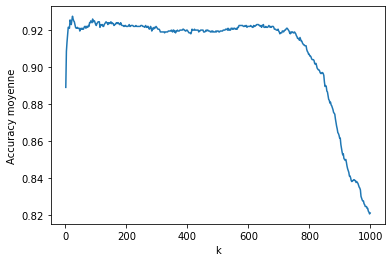

Accuracy maximum pour k = 23


In [27]:
# mélanger des exemples
index = np.random.permutation(len(X2D))
Xm = X2D[index]
Ym = Y2D[index]

# on stocke les accuracies dans une liste :
accuracies_test = []

nb_iter = 10 #nombre d'itérations de la validation croisée
seuil_k = 1000 # seuil max des valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)] # toutes les valeurs de k à regarder:

for k in valeurs_k:
    perf_test = [] #tableau des accuracies pour cette valeur de k

    #validation croisée
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        un_KNN = ClassifierKNN(2, k)
        un_KNN.train(Xapp, Yapp)
        perf_test.append(un_KNN.accuracy(Xtest, Ytest))
        
    acc_moy_test = statistics.mean(perf_test) #moyenne des accuracies de la validation croisée pour cette valeur de k
    accuracies_test.append(acc_moy_test)


# Traçage de la courbe des variations d'accuracy
plt.plot(valeurs_k,accuracies_test)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("k")
plt.show()

print("Accuracy maximum pour k =", valeurs_k[accuracies_test.index(max(accuracies_test))])

#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $k$ qui fournit le meilleur résultat est : lorsque $k$ = 23.

### <font color="green">Recherche du k optimal sur une base de test 5D:</font>

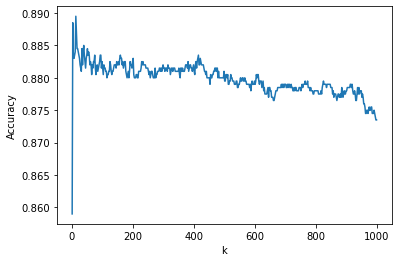

Accuracy maximum pour k = 1


In [20]:
# mélanger des exemples
index = np.random.permutation(len(X5D))
Xm = X5D[index]
Ym = Y5D[index]

# on stocke les accuracies dans une liste :
accuracies = []

nb_iter = 10 #nombre d'itérations de la validation croisée
seuil_k = 1000 # seuil max des valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)] # toutes les valeurs de k à regarder:

for k in valeurs_k:
    perf = [] #tableau des accuracies pour cette valeur de k
    
    #validation croisée
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        un_KNN = ClassifierKNN(5, k)
        un_KNN.train(Xapp, Yapp)
        perf.append(un_KNN.accuracy(Xtest, Ytest))
        
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    accuracies.append(acc_moy)
    #print("k = " + str(k) + " Taux de bonne classification moyen : " + str(acc_moy))

# Traçage de la courbe des variations d'accuracy
plt.plot(valeurs_k,accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

print("Accuracy maximum pour k =", valeurs_k[accuracies_test.index(max(accuracies_test))])

#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $k$ qui fournit le meilleur résultat est : lorsque $k$ = 1.

### <font color="green">Evolution de l'accuracy au cours de l'apprentissage sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>
Nous avons voulu voir si le fait d'entraîner plusieurs fois le classifier avec les mêmes données faisait progresser son accuracy. Pour cela nous entraînons le classifier KNN plusieurs fois de suite avec le même ensemble de données.




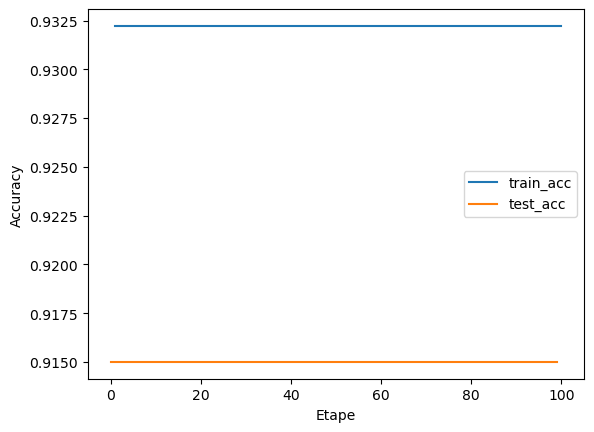

Accuracy finale (train):  0.9322222222222222
Accuracy finale (test) :  0.915


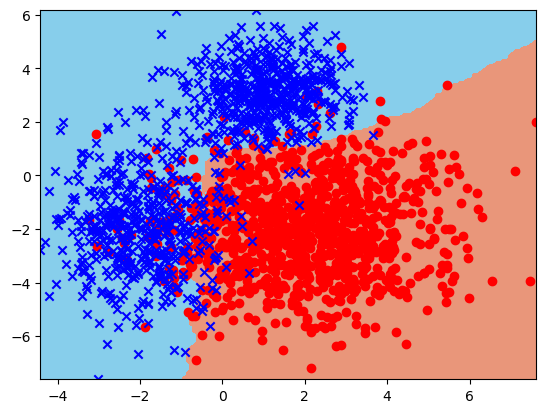

In [6]:
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X2D, Y2D,900,900)


# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []
classifierKNN2 = ClassifierKNN(2, 23)

# Réalisation de N itérations
N = 100
for i in range(N):
    classifierKNN2.train(train_desc, train_label)
    train_acc.append(classifierKNN2.accuracy(train_desc, train_label))
    test_acc.append(classifierKNN2.accuracy(test_desc, test_label))

# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.legend(['train_acc','test_acc'])
plt.show()

# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(X2D,Y2D,classifierKNN2,step=150)
plot2DSet(X2D,Y2D)

print("Accuracy finale (train): ",  classifierKNN2.accuracy(train_desc, train_label))
print("Accuracy finale (test) : ", classifierKNN2.accuracy(test_desc, test_label))

#### <font color="blue">Analyse du résultat</font>

L'accuracy ne varie pas au cours de l'apprentissage du classifierKNN ce qui semble cohérent, en effet, par définition ce classifier ne fait pas d'apprentissage donc si les données utilisées pour l'entraînement et de la valeur de k est bien choisie, alors la performance du classifier sera bonne et constante au fil du temps.

### <font color="green">Evolution de l'accuracy au cours de l'apprentissage sur une base de test 5D:</font>

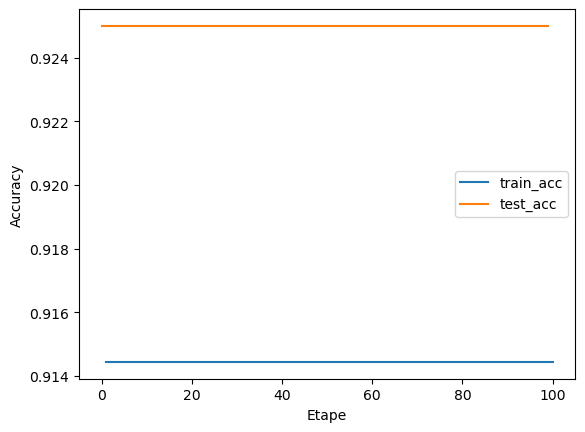

Accuracy finale (train):  0.9144444444444444
Accuracy finale (test) :  0.925


In [13]:
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X5D, Y5D,900,900)

# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []
classifierKNN2 = ClassifierKNN(5, 5)

# Réalisation de N itérations
N = 100
for i in range(N):
    classifierKNN2.train(train_desc, train_label)
    train_acc.append(classifierKNN2.accuracy(train_desc, train_label))
    test_acc.append(classifierKNN2.accuracy(test_desc, test_label))

# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.legend(['train_acc','test_acc'])
plt.show()


print("Accuracy finale (train): ",  classifierKNN2.accuracy(train_desc, train_label))
print("Accuracy finale (test) : ", classifierKNN2.accuracy(test_desc, test_label))

#### <font color="blue">Analyse du résultat</font>
Même résultat que pour le dataset 2D : l'accuracy ne varie pas lorsqu'on entraîne plus le classifier KNN.

### <font color="green">Test avec validation croisée en 10 - 2D</font>

#### <font color="blue">Argumentation</font>
Cette étude permet de mesurer la capacité du classifier KNN à généraliser sur de nouvelles données (test set) en utilisant la méthode de validation croisée.

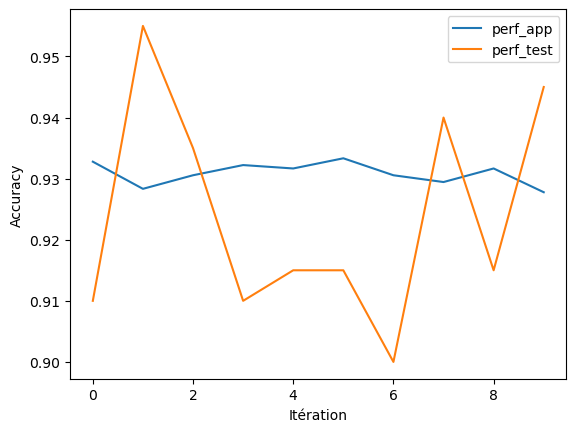

Accuracies apprentissage obtenues :  [0.9327777777777778, 0.9283333333333333, 0.9305555555555556, 0.9322222222222222, 0.9316666666666666, 0.9333333333333333, 0.9305555555555556, 0.9294444444444444, 0.9316666666666666, 0.9277777777777778]
Accuracies test obtenues :  [0.91, 0.955, 0.935, 0.91, 0.915, 0.915, 0.9, 0.94, 0.915, 0.945]
Accuracy moyenne apprentissage :  0.9308333333333333
Accuracy moyenne test :  0.924


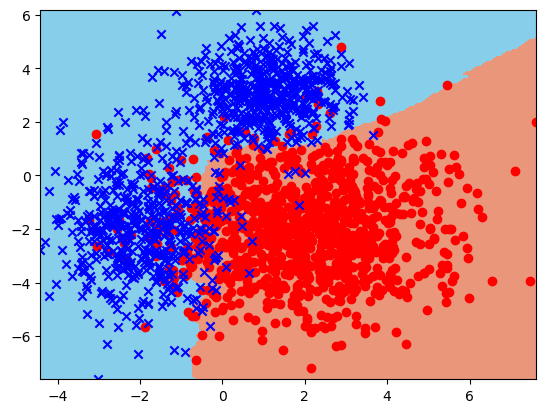

In [9]:

nb_iter = 10
perf_app = []
perf_test = []

# mélanger des exemples
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

# réaliser une validation croisée 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = ClassifierKNN(2, 23)
    un_KNN.train(Xapp, Yapp)
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf_app, perf_test)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend(['perf_app','perf_test'])
plt.show()

# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(X2D,Y2D,un_KNN,step=150)
plot2DSet(X2D,Y2D)

print("Accuracies apprentissage obtenues : ",perf_app)    
print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))

#### <font color="blue">Analyse du résultat</font>

Avec des datasets différents, on observe de légères variations de l'accuracy.
Mais le résultat global est satisfaisant, puisqu'on obtient une accuracy de test de 0.924. On observe par ailleurs que la classification du dataset d'apprentissage est de qualité plus constante que celle du dataset de test.

### <font color="green">Test avec validation croisée en 10 - 5D</font>

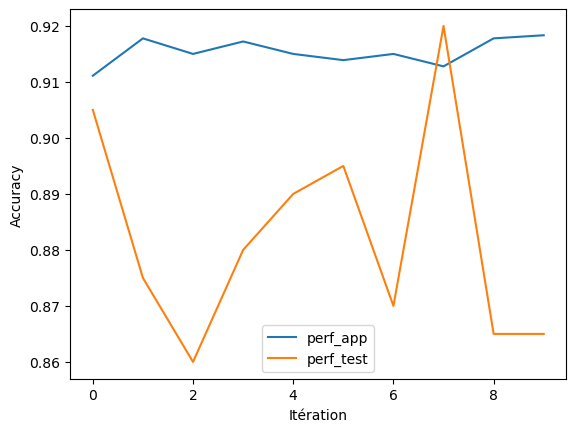

Accuracies apprentissage obtenues :  [0.9111111111111111, 0.9177777777777778, 0.915, 0.9172222222222223, 0.915, 0.9138888888888889, 0.915, 0.9127777777777778, 0.9177777777777778, 0.9183333333333333]
Accuracies test obtenues :  [0.905, 0.875, 0.86, 0.88, 0.89, 0.895, 0.87, 0.92, 0.865, 0.865]
Accuracy moyenne apprentissage :  0.9153888888888889
Accuracy moyenne test :  0.8825000000000001


In [12]:
nb_iter = 10
perf_app = []
perf_test = []

# mélanger des exemples
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]

# réaliser une validation croisée 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = ClassifierKNN(5, 5)
    un_KNN.train(Xapp, Yapp)
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf_app, perf_test)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend(['perf_app','perf_test'])
plt.show()


print("Accuracies apprentissage obtenues : ",perf_app)    
print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))

#### <font color="blue">Analyse du résultat</font>
On obtient un résultat similaire au dataset 2D : l'accuracy varie légèrement en fonction du dataset utilisé mais reste globalement satisfaisante : on a une accuracy de test de 0.88. On observe également que la qualité de la classification du dataset d'entraînement est plus constante que celle de test.

## <font color="red">Etude de la classe ClassifierPerceptron:</font>
Voici la classe ClassifierPerceptron :

In [15]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True ):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        self.init = init
        if(init == True):
            self.w = np.zeros(input_dimension)
        else:
            tmp = np.random.uniform(0,1, input_dimension)
            tmp = tmp*2-1
            self.w = [0.001*i for i in tmp]
        self.allw = [self.w.copy()] # stockage des premiers poids
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """  
        desc_copie = desc_set.copy()
        np.random.shuffle(desc_copie)
        
        for i in range(len(desc_copie)):
            p = self.predict(desc_copie[i])
            indice_xi = np.where(np.all(desc_set == desc_copie[i], axis=1))[0][0]
            yi = label_set[indice_xi]
            
            if(p != yi):
                self.w = self.w + self.learning_rate * yi * desc_copie[i]
                self.allw.append(self.w.copy())
        return
     
    def train(self, desc_set, label_set, nb_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - nb_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.001) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """
        res = []
        for i in range(nb_max):
            old_w = self.w
            self.train_step(desc_set, label_set)
            diff = old_w - self.w
            erreur = np.linalg.norm([abs(j) for j in diff])
            res.append(erreur)
            
            if(erreur < seuil):
                break

        return res

    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        v = np.dot(x,self.w)
        return v
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        if (self.score(x) < 0):
            return -1
        else:
            return 1
            
    def get_allw(self):
        return self.allw


### <font color="red">Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids 0 sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>

Pour décider quelle peut être la valeur du learning rate optimale, on décide de tester plusieurs valeurs différentes de $e$ avec un poids w = 0 (d'abord) et de comparer les taux de bonne classification sur la base de test.


test e = 0.01 Taux de bonne classification moyen : 0.7815
app e = 0.01 Taux de bonne classification moyen : 0.7896666666666666
test e = 0.02 Taux de bonne classification moyen : 0.7985
app e = 0.02 Taux de bonne classification moyen : 0.8055555555555556
test e = 0.03 Taux de bonne classification moyen : 0.796
app e = 0.03 Taux de bonne classification moyen : 0.7971111111111111
test e = 0.04 Taux de bonne classification moyen : 0.7785
app e = 0.04 Taux de bonne classification moyen : 0.7887222222222222
test e = 0.05 Taux de bonne classification moyen : 0.777
app e = 0.05 Taux de bonne classification moyen : 0.7718888888888888
test e = 0.060000000000000005 Taux de bonne classification moyen : 0.8140000000000001
app e = 0.060000000000000005 Taux de bonne classification moyen : 0.8096111111111111
test e = 0.06999999999999999 Taux de bonne classification moyen : 0.79
app e = 0.06999999999999999 Taux de bonne classification moyen : 0.7995555555555556
test e = 0.08 Taux de bonne classificatio

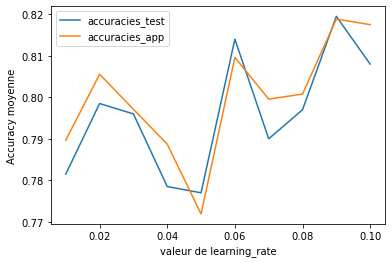

In [18]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptron(2,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("test e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("app e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $e$ qui fournit le meilleur résultat est : lorsque $e$ = 0.09.

### <font color="red">Variation de l'accuracy en fonction de la vitesse d'apprentissage sur une base de test 5D:</font>

e = 0.01 Taux de bonne classification moyen : 0.8325
e = 0.01 Taux de bonne classification moyen : 0.8241666666666667
e = 0.02 Taux de bonne classification moyen : 0.829
e = 0.02 Taux de bonne classification moyen : 0.8333333333333334
e = 0.03 Taux de bonne classification moyen : 0.797
e = 0.03 Taux de bonne classification moyen : 0.8001666666666667
e = 0.04 Taux de bonne classification moyen : 0.84
e = 0.04 Taux de bonne classification moyen : 0.8292222222222222
e = 0.05 Taux de bonne classification moyen : 0.841
e = 0.05 Taux de bonne classification moyen : 0.8425555555555555
e = 0.060000000000000005 Taux de bonne classification moyen : 0.838
e = 0.060000000000000005 Taux de bonne classification moyen : 0.8426111111111111
e = 0.06999999999999999 Taux de bonne classification moyen : 0.8255
e = 0.06999999999999999 Taux de bonne classification moyen : 0.8263333333333334
e = 0.08 Taux de bonne classification moyen : 0.834
e = 0.08 Taux de bonne classification moyen : 0.8505555555555555
e

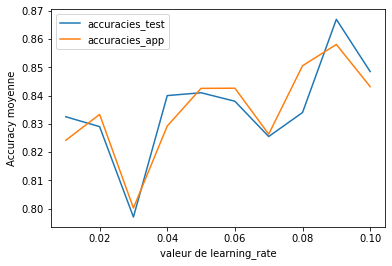

In [21]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10

#on fait varier le paramètre learning_rate
for e in np.arange(0.01, 0.11, 0.01):
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptron(5,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(np.arange(0.01, 0.11, 0.01),accuracies)
plt.plot(np.arange(0.01, 0.11, 0.01),accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()


#### <font color="blue">Analyse du résultat</font>
On remarque que la valeur de $e$ qui fournit le meilleur résultat est : lorsque $e$ = 0.09.

### <font color="red">Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids aléatoire sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>
Pour décider quelle peut être la valeur du learning rate optimale, on décide de tester plusieurs valeurs différentes de $e$ avec un poids w aléatoire et de comparer les taux de bonne classification sur la base de test.

e = 0.01 Taux de bonne classification moyen : 0.7435
e = 0.01 Taux de bonne classification moyen : 0.7370555555555556
e = 0.02 Taux de bonne classification moyen : 0.8
e = 0.02 Taux de bonne classification moyen : 0.8012777777777778
e = 0.03 Taux de bonne classification moyen : 0.7685
e = 0.03 Taux de bonne classification moyen : 0.7721111111111111
e = 0.04 Taux de bonne classification moyen : 0.7705
e = 0.04 Taux de bonne classification moyen : 0.7558333333333334
e = 0.05 Taux de bonne classification moyen : 0.7959999999999999
e = 0.05 Taux de bonne classification moyen : 0.801
e = 0.060000000000000005 Taux de bonne classification moyen : 0.7849999999999999
e = 0.060000000000000005 Taux de bonne classification moyen : 0.7812222222222223
e = 0.06999999999999999 Taux de bonne classification moyen : 0.8045
e = 0.06999999999999999 Taux de bonne classification moyen : 0.8026111111111112
e = 0.08 Taux de bonne classification moyen : 0.771
e = 0.08 Taux de bonne classification moyen : 0.7714

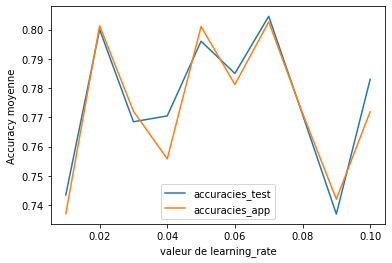

In [25]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptron(2,e,False)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>


### <font color="red">Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids aléatoire sur une base de test 5D:</font>

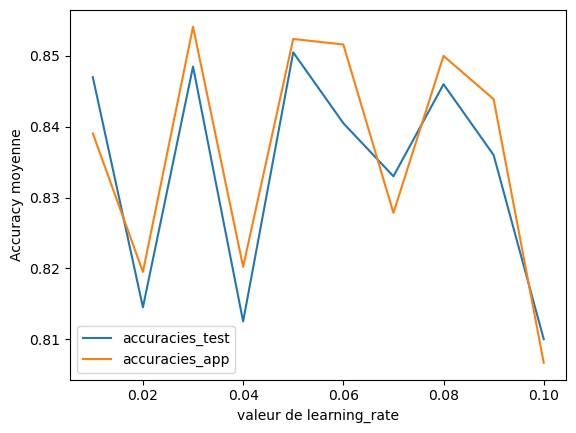

In [16]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptron(5,e, False)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e ,accuracies)
plt.plot(valeurs_e ,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>


### <font color="red">Etude de la convergence et de la variation du poids pour ClassifierPerceptron sur une base de test 2D:</font>

#### <font color="blue">Argumentation</font>

Pour vérifier si l'algorithme converge vers une solution satisfaisante, on étudie la variation du poids au fil de l'apprentissage

Nb iterations réalisées:  1000


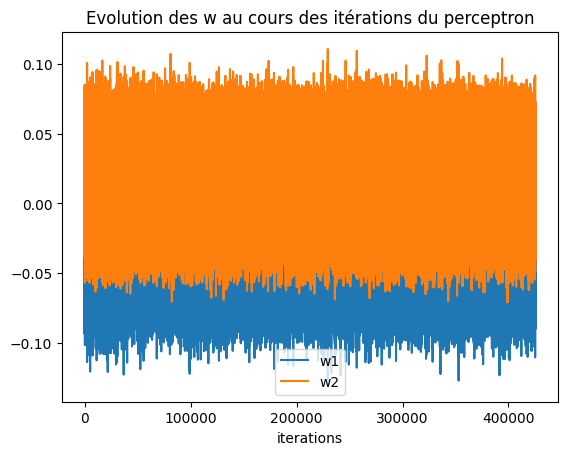

In [22]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

# Paramètres pour le perceptron:
dim = 2
eps = 0.09    # learning rate
poids_0 = False   # valeur initiale des poids à 0

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
np.random.seed(42)   # on prend 42 comme graine

perceptron2 = ClassifierPerceptron(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron2.train(Xm, Ym, nb_max=100000)
print("Nb iterations réalisées: ", len(les_differences))

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron2.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

#### <font color="blue">Analyse du résultat</font>
(Je ne sais pas comment interpréter ce résultat)

### <font color="red">Etude de la convergence et de la variation du poids pour ClassifierPerceptron sur une base de test 5D:</font>

Nb iterations réalisées:  1000


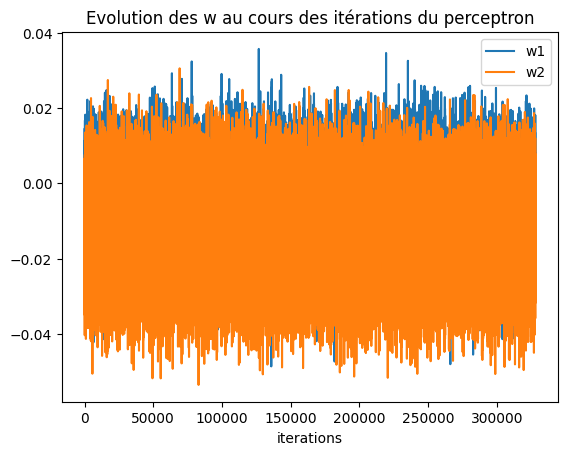

In [21]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

# Paramètres pour le perceptron:
dim = 5
eps = 0.09   # learning rate
poids_0 = False   # valeur initiale des poids à 0

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
np.random.seed(42)   # on prend 42 comme graine

perceptron2 = ClassifierPerceptron(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron2.train(Xm, Ym, nb_max=100000)
print("Nb iterations réalisées: ", len(les_differences))

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron2.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

#### <font color="blue">Analyse du résultat</font>


### <font color="red">Test avec validation croisée en 10 avec w et e idéal - 2D</font>

#### <font color="blue">Argumentation</font>
Nous effectuons une validation croisée en 10 afin d'avoir des résultats plus fiables et afin d'évaluer la capacité à généraliser à de nouvelles données du classifier Perceptron. Nous utilisons les paramètres que nous avons trouvé expérimentalement dans les sections ci-dessus, qui fournissent les meilleurs résultats, à savoir e = 0.09 et w = 0.

e = 0.09 Taux de bonne classification moyen (base test): 0.753
e = 0.09 Taux de bonne classification moyen (base apprentissage): 0.7569444444444444


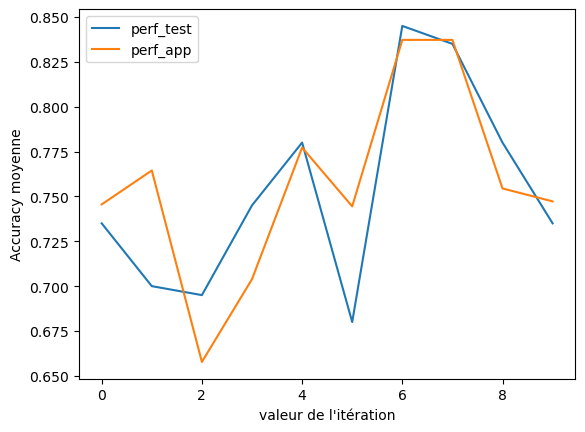

Accuracies apprentissage obtenues :  [0.7455555555555555, 0.7644444444444445, 0.6577777777777778, 0.7038888888888889, 0.7772222222222223, 0.7444444444444445, 0.8372222222222222, 0.8372222222222222, 0.7544444444444445, 0.7472222222222222]
Accuracies test obtenues :  [0.735, 0.7, 0.695, 0.745, 0.78, 0.68, 0.845, 0.835, 0.78, 0.735]
Accuracy moyenne apprentissage :  0.7569444444444444
Accuracy moyenne test :  0.753


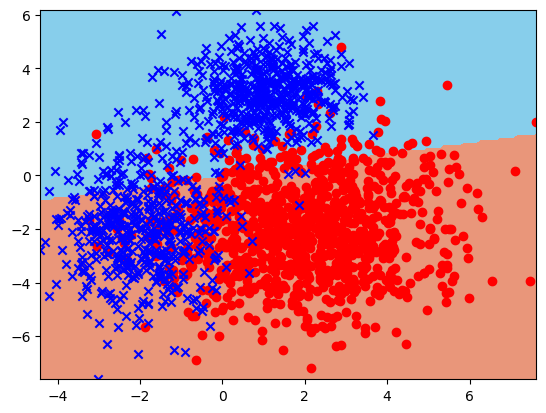

In [20]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

nb_iter = 10
e = 0.09
perf = []
perf_app = []
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptron(2,e,False)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("e = " + str(e) + " Taux de bonne classification moyen (base test): " + str(acc_moy))
print("e = " + str(e) + " Taux de bonne classification moyen (base apprentissage): " + str(acc_moy_app))

plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(X2D,Y2D,perceptron,step=150)
plot2DSet(X2D,Y2D)

print("Accuracies apprentissage obtenues : ",perf_app)    
print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

#### <font color="blue">Analyse du résultat</font>
Avec e = 0.09 et w = 0, on obtient des résultats relativement bons avec une accuracy de test moyenne de 0.753. On remarque de plus que l'accuracy de test est en moyenne très similaire à celle de l'apprentissage.

### <font color="red">Test avec validation croisée en 10 avec e et w idéal - 5D</font>

e = 0.09 Taux de bonne classification moyen (base test) : 0.847
e = 0.09 Taux de bonne classification moyen (base apprentissage): 0.8378888888888889


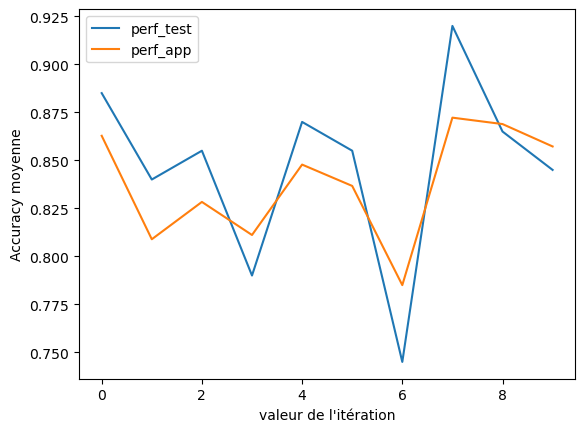

Accuracies apprentissage obtenues :  [0.8627777777777778, 0.8088888888888889, 0.8283333333333334, 0.8111111111111111, 0.8477777777777777, 0.8366666666666667, 0.785, 0.8722222222222222, 0.8688888888888889, 0.8572222222222222]
Accuracies test obtenues :  [0.885, 0.84, 0.855, 0.79, 0.87, 0.855, 0.745, 0.92, 0.865, 0.845]
Accuracy moyenne apprentissage :  0.8378888888888889
Accuracy moyenne test :  0.847


In [19]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
e = 0.09
nb_iter = 10

perf = []
perf_app = []
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptron(5,e,False)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("e = " + str(e) + " Taux de bonne classification moyen (base test) : " + str(acc_moy))
print("e = " + str(e) + " Taux de bonne classification moyen (base apprentissage): " + str(acc_moy_app))


plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

print("Accuracies apprentissage obtenues : ",perf_app)    
print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

#### <font color="blue">Analyse du résultat</font>
Avec e = 0.09 et w = 0, on obtient de bons résultats (légèrement meilleurs que pour le dataset 2D) avec une accuracy de test moyenne de 0.847. On remarque de plus que l'accuracy de test est en moyenne plus élevée que celle de l'apprentissage.

## <font color="blue">Etude de la classe ClassifierPerceptronBiais:</font>

Voici la classe ClassifierPerceptronBiais :

In [22]:
class ClassifierPerceptronBiais(ClassifierPerceptron):
    """ Perceptron de Rosenblatt avec biais
        Variante du perceptron de base
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        # Appel du constructeur de la classe mère
        super().__init__(input_dimension, learning_rate, init)
        # Affichage pour information (décommentez pour la mise au point)
        #print("Init perceptron biais: w= ",self.w," learning rate= ",learning_rate)
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        desc_copie = desc_set.copy()
        np.random.shuffle(desc_copie)
        
        for i in range(len(desc_copie)):
            p = self.score(desc_copie[i])
            indice_xi = np.where(np.all(desc_set == desc_copie[i], axis=1))[0][0]
            yi = label_set[indice_xi]
            
            if(p*yi < 1):
                self.w = self.w + self.learning_rate * (yi - p) * desc_copie[i]
                self.allw.append(self.w.copy())
        return

### Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids 0 sur une base de test 2D:

#### <font color="blue">Argumentation</font>


In [ ]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptronBiais(2,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    print("test e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    print("app e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

test e = 0.01 Taux de bonne classification moyen : 0.828
app e = 0.01 Taux de bonne classification moyen : 0.8267222222222222
test e = 0.02 Taux de bonne classification moyen : 0.8165
app e = 0.02 Taux de bonne classification moyen : 0.8222222222222222
test e = 0.03 Taux de bonne classification moyen : 0.8145
app e = 0.03 Taux de bonne classification moyen : 0.8124444444444444
test e = 0.04 Taux de bonne classification moyen : 0.828
app e = 0.04 Taux de bonne classification moyen : 0.8159444444444445


#### <font color="blue">Analyse du résultat</font>


### Variation de l'accuracy en fonction de la vitesse d'apprentissage sur une base de test 5D:

In [ ]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)
#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptronBiais(5,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e ,accuracies)
plt.plot(valeurs_e ,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>


### Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids aléatoire sur une base de test 2D:

#### <font color="blue">Argumentation</font>


In [ ]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)
#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptronBiais(2,e,False)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>


### Variation de l'accuracy en fonction de la vitesse d'apprentissage de poids aléatoire sur une base de test 5D:

In [ ]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = ClassifierPerceptronBiais(5,e, False)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

#### <font color="blue">Analyse du résultat</font>


### Etude de la convergence et de la variation du poids pour ClassifierPerceptron sur une base de test 2D:

#### <font color="blue">Argumentation</font>


In [ ]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

# Paramètres pour le perceptron:
dim = 2
eps = 0.01    # learning rate
poids_0 = False   # valeur initiale des poids à 0

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
np.random.seed(42)   # on prend 42 comme graine

perceptron2 = ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron2.train(Xm, Ym, nb_max=10000)
print("Nb iterations réalisées: ", len(les_differences))

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron2.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

#### <font color="blue">Analyse du résultat</font>


### Etude de la convergence et de la variation du poids pour ClassifierPerceptron sur une base de test 5D:

In [ ]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
#(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X2D, Y2D,900,900)

# Paramètres pour le perceptron:
dim = 5
eps = 0.01   # learning rate
poids_0 = False   # valeur initiale des poids à 0

# Réinitialisation de la graine pour la mise au point (à enlever ensuite !)
np.random.seed(42)   # on prend 42 comme graine

perceptron2 = ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron2.train(Xm, Ym, nb_max=100000)
print("Nb iterations réalisées: ", len(les_differences))

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron2.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

#### <font color="blue">Analyse du résultat</font>


### Test avec validation croisée en 10 avec w et e idéal - 2D

#### <font color="blue">Argumentation</font>


In [ ]:
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]

nb_iter = 10

perf = []
perf_app = []
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptronBiais(2,e,False)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(X2D,Y2D,perceptron,step=150)
plot2DSet(X2D,Y2D)

print("Accuracies apprentissage obtenues : ",perf_app)    
print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

#### <font color="blue">Analyse du résultat</font>


### Test avec validation croisée en 10 avec w et e idéal - 5D

In [ ]:
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]

nb_iter = 10

perf = []
perf_app = []
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = ClassifierPerceptronBiais(5,e,False)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

print("Accuracies apprentissage obtenues : ",perf_app)    
print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

#### <font color="blue">Analyse du résultat</font>


## 4. Comparaisons? des résultats